# Implicit interpolation: interactive examples

Note: for details on the method, please see other notebooks - here only an interactive example for lecture!

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.interpolate import Rbf

from ipywidgets import interactive
from IPython.display import Audio, display
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['font.size'] = 16

In [7]:
# load data
x = np.load("pts_fold_model_x.npy")
y = np.load("pts_fold_model_y.npy")
z = np.load("pts_fold_model_z.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'pts_fold_model_x.npy'

In [ ]:
def interpolate_field(x, y, z, epsilon10, smooth):
    # set up grid
    ti = np.linspace(0, 100, 100)
    XI, YI = np.meshgrid(ti, ti)

    # use RBF
    rbf = Rbf(x, y, z, epsilon=10**epsilon10, smooth=smooth)
    ZI = rbf(XI, YI)
    return ZI

def plot_model(ZI, x, y):
    ax = plt.subplot(1,1,1)
    # set up grid
    ti = np.linspace(0, 100, 100)
    XI, YI = np.meshgrid(ti, ti)
    ax.pcolor(XI, YI, ZI, alpha=0.3, shading='auto')
    ax.contour(XI, YI, ZI, [10,20,30])
    # plt.colorbar()
    # plt.plot(xvals, l1(xvals))
    # plt.plot(xvals, l2(xvals))
    # plt.plot(xvals, l3(xvals))

    ax.plot(x, y, 'o')
    # ax.plot(l2_pts_x, l2_pts_y, 'o')
    # ax.plot(l3_pts_x, l3_pts_y, 'o')

    # ax.axis('equal')
    ax.set_xlim([0,100])
    ax.set_ylim([0,50])
    # plt.tight_layout()



In [4]:
def interactive_model(epsilon10, smooth):
    ZI = interpolate_field(x, y, z, epsilon10, smooth)
    plot_model(ZI, x, y)


In [5]:
v = interactive(interactive_model, epsilon10=(-3,3,0.1), smooth=(0,5.,0.1))
display(v)

interactive(children=(FloatSlider(value=0.0, description='epsilon10', max=3.0, min=-3.0), FloatSlider(value=2.…

## Comparison of different methods

In the example above, we used the standard RBF implementation approach using a "multiquadric" kernel. Let's now compare a couple of different interpolation kernels:

In [21]:
def interpolate_multiple_fields(x, y, z, epsilon10):
    # set up grid
    ti = np.linspace(0, 100, 100)
    XI, YI = np.meshgrid(ti, ti)

    # use RBF
    rbf = Rbf(x, y, z, epsilon=10**epsilon10)
    ZI_multiquad = rbf(XI, YI)
    del(rbf)
    
    rbf = Rbf(x, y, z, function='inverse_multiquadric', epsilon=10**epsilon10)
    ZI_inverse = rbf(XI, YI)
    del(rbf)
    
    rbf = Rbf(x, y, z, function='gaussian', epsilon=10**epsilon10)
    ZI_gaussian = rbf(XI, YI)
    del(rbf)
    
    rbf = Rbf(x, y, z, function='cubic', epsilon=10**epsilon10)
    ZI_cubic = rbf(XI, YI)
    del(rbf)
    
    rbf = Rbf(x, y, z, function='quintic', epsilon=10**epsilon10)
    ZI_quintic = rbf(XI, YI)
    del(rbf)
    
    rbf = Rbf(x, y, z, function='thin_plate', epsilon=10**epsilon10)
    ZI_thinplate = rbf(XI, YI)
    del(rbf)
    
    ZIs = [ZI_multiquad, ZI_inverse, ZI_gaussian, ZI_cubic, ZI_quintic, ZI_thinplate]
    
    return ZIs

def plot_multiple_models(ZIs, x, y):
    # set up grid
    ti = np.linspace(0, 100, 100)
    XI, YI = np.meshgrid(ti, ti)
    
    fig, axes = plt.subplots(3,2)
    
    axes[0,0].pcolor(XI, YI, ZIs[0], alpha=0.3, shading='auto')
    axes[0,0].contour(XI, YI, ZIs[0], [10,20,30])
    axes[0,0].plot(x, y, 'o')
    axes[0,0].set_xlim([0,100])
    axes[0,0].set_ylim([0,50])
    axes[0,0].set_title("Multiquadric")

    ax = axes[0,1]
    ax.pcolor(XI, YI, ZIs[1], alpha=0.3, shading='auto')
    ax.contour(XI, YI, ZIs[1], [10,20,30])
    ax.plot(x, y, 'o')
    ax.set_xlim([0,100])
    ax.set_ylim([0,50])
    ax.set_title("Inverse Distance")

    ax = axes[1,0]
    ax.pcolor(XI, YI, ZIs[2], alpha=0.3, shading='auto')
    ax.contour(XI, YI, ZIs[2], [10,20,30])
    ax.plot(x, y, 'o')
    ax.set_xlim([0,100])
    ax.set_ylim([0,50])
    ax.set_title("Gaussian")

    ax = axes[1,1]
    ax.pcolor(XI, YI, ZIs[3], alpha=0.3, shading='auto')
    ax.contour(XI, YI, ZIs[3], [10,20,30])
    ax.plot(x, y, 'o')
    ax.set_xlim([0,100])
    ax.set_ylim([0,50])
    ax.set_title("Cubic")


    ax = axes[2,0]
    ax.pcolor(XI, YI, ZIs[4], alpha=0.3, shading='auto')
    ax.contour(XI, YI, ZIs[4], [10,20,30])
    ax.plot(x, y, 'o')
    ax.set_xlim([0,100])
    ax.set_ylim([0,50])
    ax.set_title("Quintic")


    ax = axes[2,1]
    ax.pcolor(XI, YI, ZIs[5], alpha=0.3, shading='auto')
    ax.contour(XI, YI, ZIs[5], [10,20,30])
    ax.plot(x, y, 'o')
    ax.set_xlim([0,100])
    ax.set_ylim([0,50])
    ax.set_title("Thinplate")

    plt.tight_layout()




In [22]:
def interactive_multiple_model(epsilon10):
    ZIs = interpolate_multiple_fields(x, y, z, epsilon10)
    plot_multiple_models(ZIs, x, y)



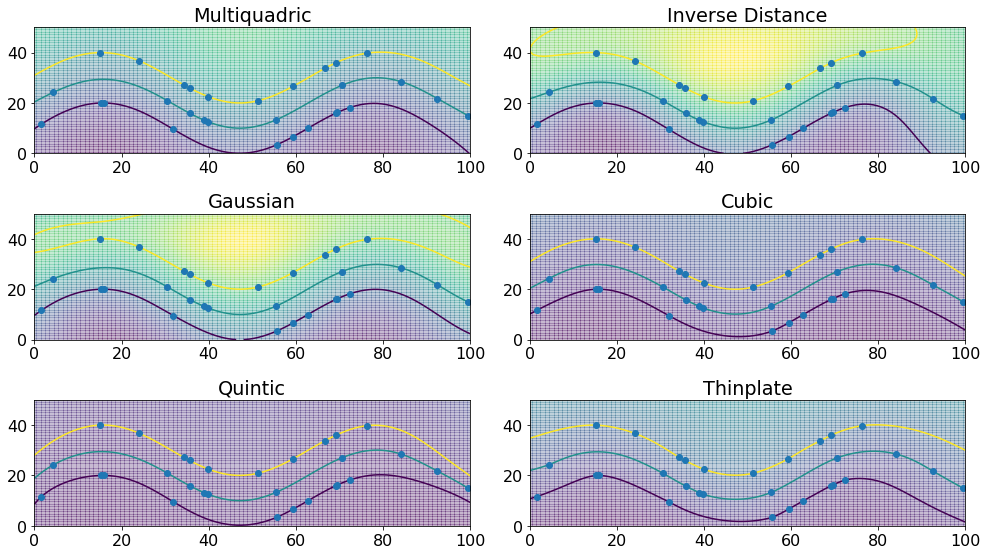

In [26]:
plt.rcParams['figure.figsize'] = [14,8]
interactive_multiple_model(1.4)

In [178]:
Rbf?